# 1. First reports 

## 1.1. Annoucements category repartition per wilaya

In [4]:
fig = px.histogram(data_cleaned,x="wilaya",color="category", title ="Annoucements category repartition per wilaya").update_xaxes(categoryorder='total descending')
fig.show()

### Comments
* Select only Alger wilaya

In [5]:
## 1.2. Annoucements category repartition per wilaya

In [6]:
data_cleaned_alger = data_cleaned[data_cleaned["wilaya"]=="Alger"]
# mitosheet.sheet(data_cleaned_alger, analysis_to_replay="id-ttzrezrnrm")

In [7]:
fig = px.histogram(data_cleaned_alger,x="commune",color="category",title="Annoucements category repartition per commune for Alger").update_xaxes(categoryorder='total descending')
fig.show()

### Choix des variables metiers  : 
* Wilaya : Alger 
* PriceUnit : Million
* Category : Appartement, local, niveau de villa, villa 
* Commune : prendre toutes les commune 
* asset-in-promotional-site
* etages 
* sale-by-real-estate-aget

In [8]:
data_cleaned_alger_thin = data_cleaned_alger[["commune","category","price","pieces","superficie","sale-by-real-estate-agent","etages","asset-in-a-promotional-site"]]
data_cleaned_alger_thin.head()

,commune,category,price,pieces,superficie,sale-by-real-estate-agent,etages,asset-in-a-promotional-site
0,Ouled fayet,Appartement,80000.0,3,87,True,<NA>,True
1,Bordj el kiffan,Appartement,45000.0,2,49,True,1,True
2,Hydra,Appartement,150000.0,8,250,True,1,True
3,Birkhadem,Local,110000.0,<NA>,95,True,<NA>,True
4,Bordj el kiffan,Appartement,45000.0,3,90,True,2,True


In [9]:
# mitosheet.sheet(data_cleaned_alger_thin, analysis_to_replay="id-ymfpnyzuhi")

## Feature engineering 

## missing values

In [10]:
# Choose the target and features
target = ["price"]
features_num = [ "location_duree","superficie","pieces","etages"]
features_cat = ["category","wilaya","commune"]

# Creare new data frame with selected features 
data = data_cleaned[ ["createdAt"] + features_num + features_cat + target]

# Drop all missing values
data.dropna(inplace=True)
# y = data_cleaned[target]
# X = data_cleaned[features_num + features_cat]
data.head()

,createdAt,location_duree,superficie,pieces,etages,category,wilaya,commune,price
1,2022-12-20 01:45:06+00:00,6,49,2,1,Appartement,Alger,Bordj el kiffan,45000.0
2,2022-12-20 01:37:03+00:00,6,250,8,1,Appartement,Alger,Hydra,150000.0
4,2022-12-20 01:30:07+00:00,6,90,3,2,Appartement,Alger,Bordj el kiffan,45000.0
6,2022-12-20 00:01:01+00:00,1,170,4,2,Niveau De Villa,Annaba,Annaba,12000.0
7,2022-12-19 23:45:00+00:00,6,200,4,1,Niveau De Villa,Medea,Ksar boukhari,50000.0


In [11]:
data.isnull().sum()/len(data)*100


createdAt         0.0
location_duree    0.0
superficie        0.0
pieces            0.0
etages            0.0
category          0.0
wilaya            0.0
commune           0.0
price             0.0
dtype: float64

In [12]:
data.shape

(17735, 9)

# Outliers

In [13]:
# mitosheet.sheet(df, analysis_to_replay="id-lbfpobikzo")

In [14]:
import pandas as pd

# Define a function to identify and handle outliers using IQR
def handle_outliers_iqr(dataframe, features_num, factor=1.5, replace_with=None):
    df = dataframe.copy()
    for feature in features_num:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        # Identify and potentially replace outliers
        outliers = (df[feature] < lower_bound) | (df[feature] > upper_bound)
        if replace_with is not None:
            df.loc[outliers, feature] = replace_with
        else:
            df = df[~outliers]
    return df

# Use the function to handle outliers using IQR
# data_cleaned_iqr = handle_outliers_iqr(data, features_num)


In [15]:
variables_to_iqr =  ["superficie","price"]

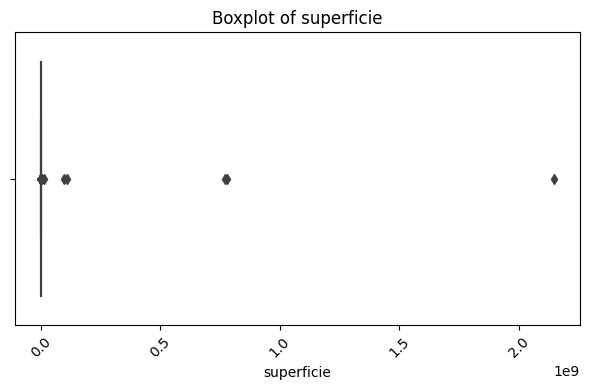

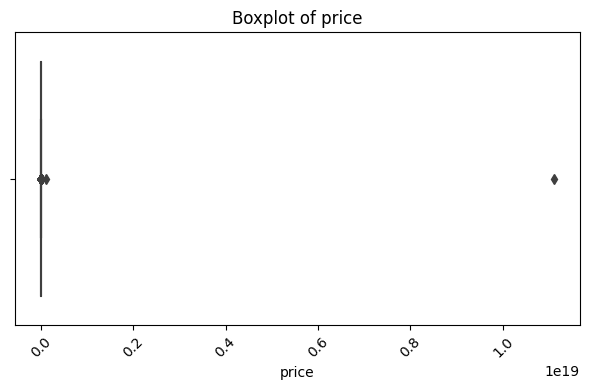

In [16]:
# Create a boxplot for each variable before iqr
for variable in variables_to_iqr:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=variable, data=data)
    plt.title(f'Boxplot of {variable}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [17]:
data_cleaned_iqr  = handle_outliers_iqr(data, variables_to_iqr)

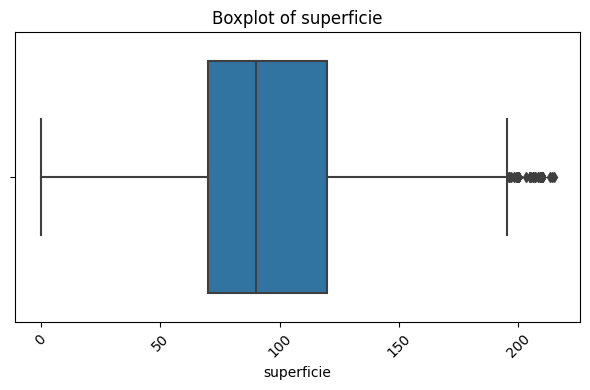

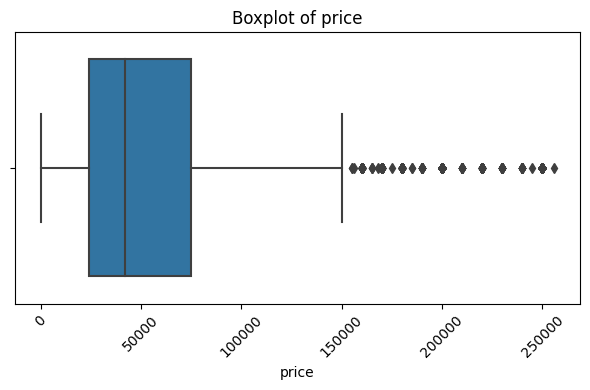

In [18]:

# Create a boxplot for each variable
for variable in variables_to_iqr:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=variable, data=data_cleaned_iqr)
    plt.title(f'Boxplot of {variable}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [19]:
data_cleaned_iqr

,createdAt,location_duree,superficie,pieces,etages,category,wilaya,commune,price
1,2022-12-20 01:45:06+00:00,6,49,2,1,Appartement,Alger,Bordj el kiffan,45000.0
4,2022-12-20 01:30:07+00:00,6,90,3,2,Appartement,Alger,Bordj el kiffan,45000.0
6,2022-12-20 00:01:01+00:00,1,170,4,2,Niveau De Villa,Annaba,Annaba,12000.0
7,2022-12-19 23:45:00+00:00,6,200,4,1,Niveau De Villa,Medea,Ksar boukhari,50000.0
11,2022-12-19 23:23:38+00:00,6,65,3,5,Appartement,Blida,Beni mered,24000.0
...,...,...,...,...,...,...,...,...,...
40408,2013-08-14 07:51:23+00:00,6,80,3,6,Appartement,Alger,Birkhadem,35000.0
40410,2013-06-27 10:47:24+00:00,6,90,3,1,Niveau De Villa,Alger,Kouba,80000.0
40411,2013-06-18 07:48:52+00:00,6,120,4,1,Appartement,Alger,Hydra,200000.0
40414,2013-03-09 08:40:17+00:00,6,120,4,2,Appartement,Alger,Hydra,150000.0


<Axes: >

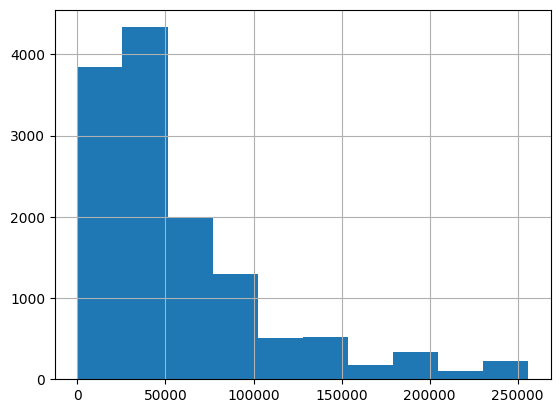

In [20]:
data_cleaned_iqr['price'].hist()

# Found best parameters 

In [21]:
import xgboost as xgb


In [21]:
import mlflow
from sklearn.feature_extraction import DictVectorizer
import xgboost as xgb
import pickle
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


df = data_cleaned_iqr.copy()
# mlflow.set_tracking_uri("sqlite:///mlflow.db")
# mlflow.set_experiment("project-experiment")

In [22]:
# Calculate the number of rows for training and validation
num_rows = df.shape[0]
num_rows_train = int(0.8 * num_rows)
num_rows_val = num_rows - num_rows_train

# Split the DataFrame into training and validation
df_train = df[:num_rows_train]
df_val = df[num_rows_train:]

categorical  = ["category",	"wilaya",	"commune"]
numerical = ["location_duree",	"superficie",	"pieces",	"etages","price"]

# Vectorize categorical values in order to prepare data for xgboost
dv = DictVectorizer()
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_train = df_train["price"].values
y_val = df_val["price"].values

train = xgb.DMatrix(X_train, label=y_train)
valid = xgb.DMatrix(X_val, label=y_val)

In [25]:
val_dicts

[{'category': 'Appartement',
  'wilaya': 'Sidi bel abbes',
  'commune': 'Sidi bel abbes',
  'location_duree': 6,
  'superficie': 72,
  'pieces': 3,
  'etages': 3,
  'price': 1.0},
 {'category': 'Location',
  'wilaya': 'Tizi ouzou',
  'commune': 'Tigzirt',
  'location_duree': 1,
  'superficie': 78,
  'pieces': 3,
  'etages': 4,
  'price': 8000.0},
 {'category': 'Niveau De Villa',
  'wilaya': 'Oran',
  'commune': 'Bir el djir',
  'location_duree': 6,
  'superficie': 125,
  'pieces': 3,
  'etages': 1,
  'price': 1.0},
 {'category': 'Appartement',
  'wilaya': 'Alger',
  'commune': 'Mahelma',
  'location_duree': 6,
  'superficie': 137,
  'pieces': 5,
  'etages': 4,
  'price': 40000.0},
 {'category': 'Appartement',
  'wilaya': 'Alger',
  'commune': 'El achour',
  'location_duree': 6,
  'superficie': 80,
  'pieces': 3,
  'etages': 3,
  'price': 100000.0},
 {'category': 'Appartement',
  'wilaya': 'Alger',
  'commune': 'Bordj el bahri',
  'location_duree': 6,
  'superficie': 104,
  'pieces': 4,

In [24]:
def objective(params):
    with mlflow.start_run():
        mlflow.set_tag("model", "xgboost")
        mlflow.log_params(params)
        booster = xgb.train(
            params=params,
            dtrain=train,
            num_boost_round=1000,
            evals=[(valid, 'validation')],
            early_stopping_rounds=50
            # early_stopping_rounds=2
        )
        y_pred = booster.predict(valid)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        mape = mean_absolute_percentage_error(y_val,y_pred)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mape", mape)

    return {'loss': rmse, "mape" : mape, 'status': STATUS_OK}

In [25]:
search_space = {
    'max_depth': scope.int(hp.quniform('max_depth', 2, 200, 1)),
    'learning_rate': hp.loguniform('learning_rate', -10, 0),
    'reg_alpha': hp.loguniform('reg_alpha', -10, -1),
    'reg_lambda': hp.loguniform('reg_lambda', -10, -1),
    'min_child_weight': hp.loguniform('min_child_weight', -10, 3),
    'objective': 'reg:squarederror',
    'seed': 42
}

# Saving best results 
best_result = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=50,# Number of evaluations to perform
    trials=Trials()
)

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

[0]	validation-rmse:87002.74959                       
[1]	validation-rmse:86990.36685                       
[2]	validation-rmse:86977.98537                       
[3]	validation-rmse:86965.60406                       
[4]	validation-rmse:86953.22439                       
[5]	validation-rmse:86940.84803                       
[6]	validation-rmse:86928.47248                       
[7]	validation-rmse:86916.09806                       
[8]	validation-rmse:86903.72652                       
[9]	validation-rmse:86891.35582                       
[10]	validation-rmse:86878.98911                      
[11]	validation-rmse:86866.62118                      
[12]	validation-rmse:86854.25741                      
[13]	validation-rmse:86841.89396                      
[14]	validation-rmse:86829.53258                      
[15]	validation-rmse:86817.17305                      
[16]	validation-rmse:86804.81593                      
[17]	validation-rmse:86792.46051                      
[18]	valid

In [ ]:
best_result["max_depth"] = int(best_result["max_depth"])

In [ ]:
# Retrain the best model 
with mlflow.start_run():
    mlflow.log_params(best_result)
    booster = xgb.train(
        params=best_result,
        dtrain=train,
        num_boost_round=1000,
        evals=[(valid, 'validation')],
        early_stopping_rounds=100
    )

    y_pred = booster.predict(valid)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mlflow.log_metric("rmse", rmse)

    with open("models/preprocessor.b", "wb") as f_out:
        pickle.dump(dv, f_out)
    mlflow.log_artifact("models/preprocessor.b", artifact_path="preprocessor")

    mlflow.xgboost.log_model(booster, artifact_path="models_mlflow")

[0]	validation-rmse:50245.39636


[1]	validation-rmse:29008.19465
[2]	validation-rmse:16746.21413
[3]	validation-rmse:9667.97062
[4]	validation-rmse:5581.61291
[5]	validation-rmse:3222.55927
[6]	validation-rmse:1860.57458
[7]	validation-rmse:1074.41307
[8]	validation-rmse:620.96110
[9]	validation-rmse:359.60307
[10]	validation-rmse:209.73349
[11]	validation-rmse:124.83213
[12]	validation-rmse:78.35716
[13]	validation-rmse:54.82154
[14]	validation-rmse:44.35701
[15]	validation-rmse:40.33266
[16]	validation-rmse:38.93594
[17]	validation-rmse:38.47529
[18]	validation-rmse:38.33168
[19]	validation-rmse:38.29075
[20]	validation-rmse:38.28165
[21]	validation-rmse:38.28134
[22]	validation-rmse:38.28214
[23]	validation-rmse:38.28293
[24]	validation-rmse:38.28348
[25]	validation-rmse:38.28437
[26]	validation-rmse:38.28466
[27]	validation-rmse:38.28490
[28]	validation-rmse:38.28495
[29]	validation-rmse:38.28494
[30]	validation-rmse:38.28494
[31]	validation-rmse:38.28494
[32]	validation-rmse:38.28496
[33]	validation-rmse:38.28496

In [ ]:
import mlflow
logged_model = 'runs:/ef9b696a28ee4e8887251cad7d3dd9e4/models_mlflow'


In [ ]:
logged_model

'runs:/ef9b696a28ee4e8887251cad7d3dd9e4/models_mlflow'